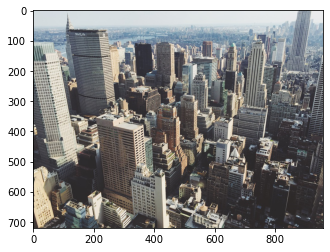

0 255
0 1
85 219


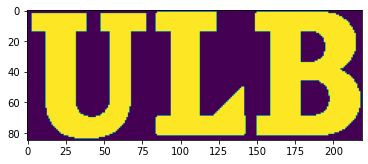

range value :  0.00392156862745098 1.0
mean value :  0.4211935346257762


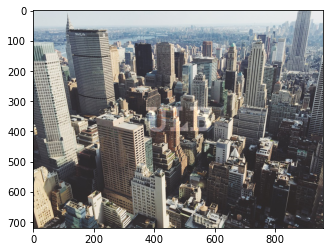

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [108]:
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt
from skimage.color import rgb2hsv
import numpy as np
%matplotlib inline

## -- Your code here -- ##
im = imread("nyc.jpg").astype(np.uint8)

plt.figure()
plt.imshow(im)
plt.show()

#préparation du watermark 

init = imread("watermark.png")
print(np.amin(init), np.amax(init))

wm = 1*(init > 140)
print(np.amin(wm), np.amax(wm))
print(wm.shape[0], wm.shape[1])
wmpetit = wm[::2,::2]

plt.figure()
plt.imshow(wm)
plt.show()


def addwmcoord(im, wm, y, x) : #y and x are the coordinates of the top left corner of the watermark 
    
    hsv = rgb2hsv(im)

    value = hsv[:, :, 2]

    print('range value : ', np.amin(value), np.amax(value))
    
    mean_v = value[y:y+wm.shape[0] ,x:x+wm.shape[1]].sum()/wm.shape[0]/wm.shape[1]
    print('mean value : ' , mean_v)

    if mean_v < np.amax(value)/2 : 
        for i in range(wm.shape[0]) : 
            for j in range(wm.shape[1]) :
                if wm[i,j] == 1 :  
                    if value[y+i,x+j]+ 0.3 > 1 : 
                        value[y+i,x+j] = 1
                    else : 
                        value[y+i,x+j] += 0.3
    else : 
        for i in range(wm.shape[0]) : 
            for j in range(wm.shape[1]) :
                if wm[i,j] == 1 :  
                    if value[y+i,x+j]- 0.3 > 0 : 
                        value[y+i,x+j] -= 0.3
                    else : 
                        value[y+i,x+j] = 0

    im2 = hsv2rgb(hsv)
                
    return im2

def addwmspot(im, wm, spot) :  #spot is the place where the image is going to go => choose between center, tl, tr, bl, br, as a string 

    if spot == 'center' : 
        im = addwmcoord(im, wm, (im.shape[0]//2)-(wm.shape[0]//2), (im.shape[1]//2)-(wm.shape[1]//2))
    elif spot == 'tl' : 
        im = addwmcoord(im, wm, 20, 20)
    elif spot == 'tr' : 
        im = addwmcoord(im, wm, 20, im.shape[1]-wm.shape[1]-20 )
    elif spot == 'bl' : 
        im = addwmcoord(im, wm, im.shape[0]-wm.shape[0]-20, 20)
    elif spot == 'br' : 
        im = addwmcoord(im, wm, im.shape[0]-wm.shape[0]-20, im.shape[1]-wm.shape[1]-20)
    else : 
        print ('I dont know this spot, you can either enter center, tl, tr, bl, br. Otherwise use the addwmcoord function with yout wanted coordinates')
        
                
    return im

im_wm = addwmspot(im, wm, 'center')
            
plt.figure()
plt.imshow(im_wm)
plt.show()

imsave("result_proj_1.jpg", im_wm)
